# Processing Data from the NCAR Mesa Lab Weather Station

There is a weather station located at the Mesa Lab, situated along the Foothills of the Rockies in Boulder, Colorado! Here is a picture of the lab!

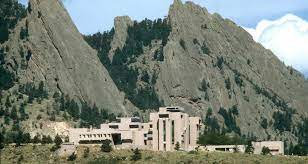

This station collects data every 10 minutes, is publicly available from [this site](https://www.eol.ucar.edu/content/ncar-foothills-lab-weather-station-information), with live plots [viewable here](https://archive.eol.ucar.edu/cgi-bin/weather.cgi?site=ml&period=5-minute&fields=tdry&fields=rh&fields=cpres0&fields=wspd&fields=wdir&fields=raina&units=english)

## Imports
In this example, we only require `xarray` and `pandas`!

In [104]:
import pandas as pd
import xarray as xr

## The Problem

When first accessing the data, you'll notice that are file extenstions - `.cdf` and `.nc`

The data are all stored in `netcdf` format, which is a binary data format. If you are interested in learning more about `netcdf`, check out the Pythia Foundations material on this!

One issue here though is within the `.cdf` data... we can read in the data, but we do not helpful time information...

We can load it in using `xarray`, as shown below!

In [90]:
cdf_ds = xr.open_dataset('mlab.20200701.cdf')
cdf_ds

<xarray.Dataset>
Dimensions:      (time: 288)
Dimensions without coordinates: time
Data variables: (12/20)
    base_time    int32 ...
    samp_secs    int32 ...
    lat          float32 ...
    lon          float32 ...
    alt          float32 ...
    station      int32 ...
    ...           ...
    wmax         (time) float32 ...
    wsdev        (time) float32 ...
    wchill       (time) float32 ...
    raina        (time) float32 ...
    raina24      (time) float32 ...
    bat          (time) float32 ...

### Dealing the Time
We do have a few time related variables:
* `base_time` - number of seconds since 1970-01-01
* `samp_secs` - sample interval in seconds
* `time_offset` - number of seconds from `base_time` for a given observation

In [91]:
cdf_ds[['base_time', 'samp_secs', 'time_offset']]

<xarray.Dataset>
Dimensions:      (time: 288)
Dimensions without coordinates: time
Data variables:
    base_time    int32 1593561600
    samp_secs    int32 300
    time_offset  (time) float32 0.0 300.0 600.0 ... 8.55e+04 8.58e+04 8.61e+04

## The Solution
Fortunately, we can use the `time_offset` variable, in conjunction with the `base_time` to determine a human-readable time dimension!

`pandas.datetime` has a helpful tool for this!

### Calculating the New Time Axis

We start first by calculating the time in units `seconds since 1970-01-01`, by adding the `time_offset` to `base_time`

In [92]:
new_time = cdf_ds.base_time + cdf_ds.time_offset
new_time

<xarray.DataArray (time: 288)>
array([1.5935616e+09, 1.5935619e+09, 1.5935622e+09, 1.5935625e+09,
       1.5935628e+09, 1.5935631e+09, 1.5935634e+09, 1.5935637e+09,
       1.5935640e+09, 1.5935643e+09, 1.5935646e+09, 1.5935649e+09,
       1.5935652e+09, 1.5935655e+09, 1.5935658e+09, 1.5935661e+09,
       1.5935664e+09, 1.5935667e+09, 1.5935670e+09, 1.5935673e+09,
       1.5935676e+09, 1.5935679e+09, 1.5935682e+09, 1.5935685e+09,
       1.5935688e+09, 1.5935691e+09, 1.5935694e+09, 1.5935697e+09,
       1.5935700e+09, 1.5935703e+09, 1.5935706e+09, 1.5935709e+09,
       1.5935712e+09, 1.5935715e+09, 1.5935718e+09, 1.5935721e+09,
       1.5935724e+09, 1.5935727e+09, 1.5935730e+09, 1.5935733e+09,
       1.5935736e+09, 1.5935739e+09, 1.5935742e+09, 1.5935745e+09,
       1.5935748e+09, 1.5935751e+09, 1.5935754e+09, 1.5935757e+09,
       1.5935760e+09, 1.5935763e+09, 1.5935766e+09, 1.5935769e+09,
       1.5935772e+09, 1.5935775e+09, 1.5935778e+09, 1.5935781e+09,
       1.5935784e+09, 1.5935787e+09, 1.5935790e+09, 1.5935793e+09,
       1.5935796e+09, 1.5935799e+09, 1.5935802e+09, 1.5935805e+09,
       1.5935808e+09, 1.5935811e+09, 1.5935814e+09, 1.5935817e+09,
       1.5935820e+09, 1.5935823e+09, 1.5935826e+09, 1.5935829e+09,
       1.5935832e+09, 1.5935835e+09, 1.5935838e+09, 1.5935841e+09,
       1.5935844e+09, 1.5935847e+09, 1.5935850e+09, 1.5935853e+09,
...
       1.5936240e+09, 1.5936243e+09, 1.5936246e+09, 1.5936249e+09,
       1.5936252e+09, 1.5936255e+09, 1.5936258e+09, 1.5936261e+09,
       1.5936264e+09, 1.5936267e+09, 1.5936270e+09, 1.5936273e+09,
       1.5936276e+09, 1.5936279e+09, 1.5936282e+09, 1.5936285e+09,
       1.5936288e+09, 1.5936291e+09, 1.5936294e+09, 1.5936297e+09,
       1.5936300e+09, 1.5936303e+09, 1.5936306e+09, 1.5936309e+09,
       1.5936312e+09, 1.5936315e+09, 1.5936318e+09, 1.5936321e+09,
       1.5936324e+09, 1.5936327e+09, 1.5936330e+09, 1.5936333e+09,
       1.5936336e+09, 1.5936339e+09, 1.5936342e+09, 1.5936345e+09,
       1.5936348e+09, 1.5936351e+09, 1.5936354e+09, 1.5936357e+09,
       1.5936360e+09, 1.5936363e+09, 1.5936366e+09, 1.5936369e+09,
       1.5936372e+09, 1.5936375e+09, 1.5936378e+09, 1.5936381e+09,
       1.5936384e+09, 1.5936387e+09, 1.5936390e+09, 1.5936393e+09,
       1.5936396e+09, 1.5936399e+09, 1.5936402e+09, 1.5936405e+09,
       1.5936408e+09, 1.5936411e+09, 1.5936414e+09, 1.5936417e+09,
       1.5936420e+09, 1.5936423e+09, 1.5936426e+09, 1.5936429e+09,
       1.5936432e+09, 1.5936435e+09, 1.5936438e+09, 1.5936441e+09,
       1.5936444e+09, 1.5936447e+09, 1.5936450e+09, 1.5936453e+09,
       1.5936456e+09, 1.5936459e+09, 1.5936462e+09, 1.5936465e+09,
       1.5936468e+09, 1.5936471e+09, 1.5936474e+09, 1.5936477e+09])
Dimensions without coordinates: time

That array is hard to read though... we can pass this into `pandas.to_datetime` to handle the conversion!

In [96]:
times = pd.to_datetime(new_time.values, unit='s')
times

DatetimeIndex(['2020-07-01 00:00:00', '2020-07-01 00:05:00',
               '2020-07-01 00:10:00', '2020-07-01 00:15:00',
               '2020-07-01 00:20:00', '2020-07-01 00:25:00',
               '2020-07-01 00:30:00', '2020-07-01 00:35:00',
               '2020-07-01 00:40:00', '2020-07-01 00:45:00',
               ...
               '2020-07-01 23:10:00', '2020-07-01 23:15:00',
               '2020-07-01 23:20:00', '2020-07-01 23:25:00',
               '2020-07-01 23:30:00', '2020-07-01 23:35:00',
               '2020-07-01 23:40:00', '2020-07-01 23:45:00',
               '2020-07-01 23:50:00', '2020-07-01 23:55:00'],
              dtype='datetime64[ns]', length=288, freq=None)

That looks better! We can now add this to our dimensions for the dataset.

In [99]:
cdf_ds['time'] = times
cdf_ds

<xarray.Dataset>
Dimensions:      (time: 288)
Coordinates:
  * time         (time) datetime64[ns] 2020-07-01 ... 2020-07-01T23:55:00
Data variables: (12/20)
    base_time    int32 1593561600
    samp_secs    int32 300
    lat          float32 39.98
    lon          float32 -105.3
    alt          float32 1.885
    station      int32 0
    ...           ...
    wmax         (time) float32 2.8 2.5 1.1 1.8 1.9 3.1 ... 7.0 5.2 5.1 4.8 2.6
    wsdev        (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    wchill       (time) float32 22.9 22.7 22.8 22.9 ... 25.25 25.03 25.93 26.2
    raina        (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    raina24      (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    bat          (time) float32 13.9 13.8 13.8 13.9 13.9 ... 13.8 13.8 13.8 13.8

### Wrapping into a Function and Using as a Preprocessor

We can wrap this into a function, then pass this into `xr.open_mfdataset` to process multiple files at the same time!

In [100]:
def fix_times(ds):
    ds['time'] = pd.to_datetime((ds.base_time + ds.time_offset).values, unit='s')
    return ds.drop(['base_time', 'samp_secs', 'time_offset'])

We can then pass our `fix_time` function into `xr.open_mfdataset` using the `preprocess` argument

In [102]:
ds = xr.open_mfdataset('*.cdf', engine='netcdf4', concat_dim='time', preprocess=fix_times)

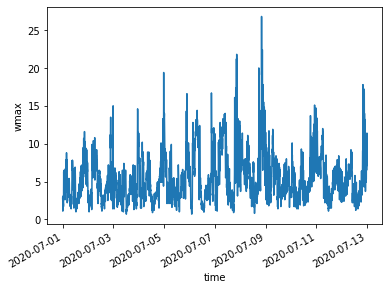

In [103]:
ds.wmax.plot();

## Conclusion
Both `Xarray` and `Pandas` have helpful tools to deal with data cleaning, especially when working with time! Within this example, we showed how to apply this time cleaning step to data collected from the NCAR Mesa Lab Weather Station, passing this cleaning step into the `pre_process` argument in `open_mfdataset`!